<div style="text-align:center;">
    
# Optimisation sous contraintes
# Méthode de dualité : Algorithme d'Uzawa
<br/>
</div>

Dans ce TP, nous allons tester la convergence de l'algorithme d'Uzawa. <br/> Les détails de l'implémentation des algorithmes utilisés se trouvent dans le dossier **utils**.

## Préparation de l'environnement de travail

In [2]:
import numpy as np
from utils.utils import Function, UzawaSolver, UzawaPlotter

## Cas d'étude 1 : Une fonction simple et bien conditionnée

Dans un premier temps, nous voulons tester la convergence de notre implémentation de l'algourithme d'Uzawa sur un cas simple.

Considérons la fonction suivante : 
$$f(x, y) = x^2 + y ^ 2$$

Nous voulons optimiser cette fonction sous la contrainte suivante :

$$K = \{(x, y) \in \mathbb{R}^2\ |\ g(x, y) = -x-y+1 \leq 0 \}$$

L'optimum théorique est donné par :

$$X^{*} = (\frac{1}{2}, \frac{1}{2})$$

In [3]:
# define the first function
function_1 = Function(
    lambda x: x[0] ** 2 + x[1] ** 2,
    lambda x: np.array([2 * x[0], 2 * x[1]]),
    lambda x: np.array([[2, 0], [0, 2]])
)

In [4]:
# define the constraint

constraint_1 = Function(
    lambda x: -x[0] - x[1] + 1,
    lambda x: np.array([-1, -1]),
    lambda x: np.array([[0, 0], [0, 0]])
)

In [4]:
# call the Uzawa function
solver = UzawaSolver(function_1, [constraint_1])
solver.solve_min(x0_internal=np.array([-2, -2]), _lambda=np.array([5]), tau=0.1, max_iter=100, max_iter_internal=500)
solver.iters

100

--------------------------------------------------------------------------------------

            
            Calculated Optiaml x: [0.50005905 0.50005905]
            iteration to convergence: 100


--------------------------------------------------------------------------------------


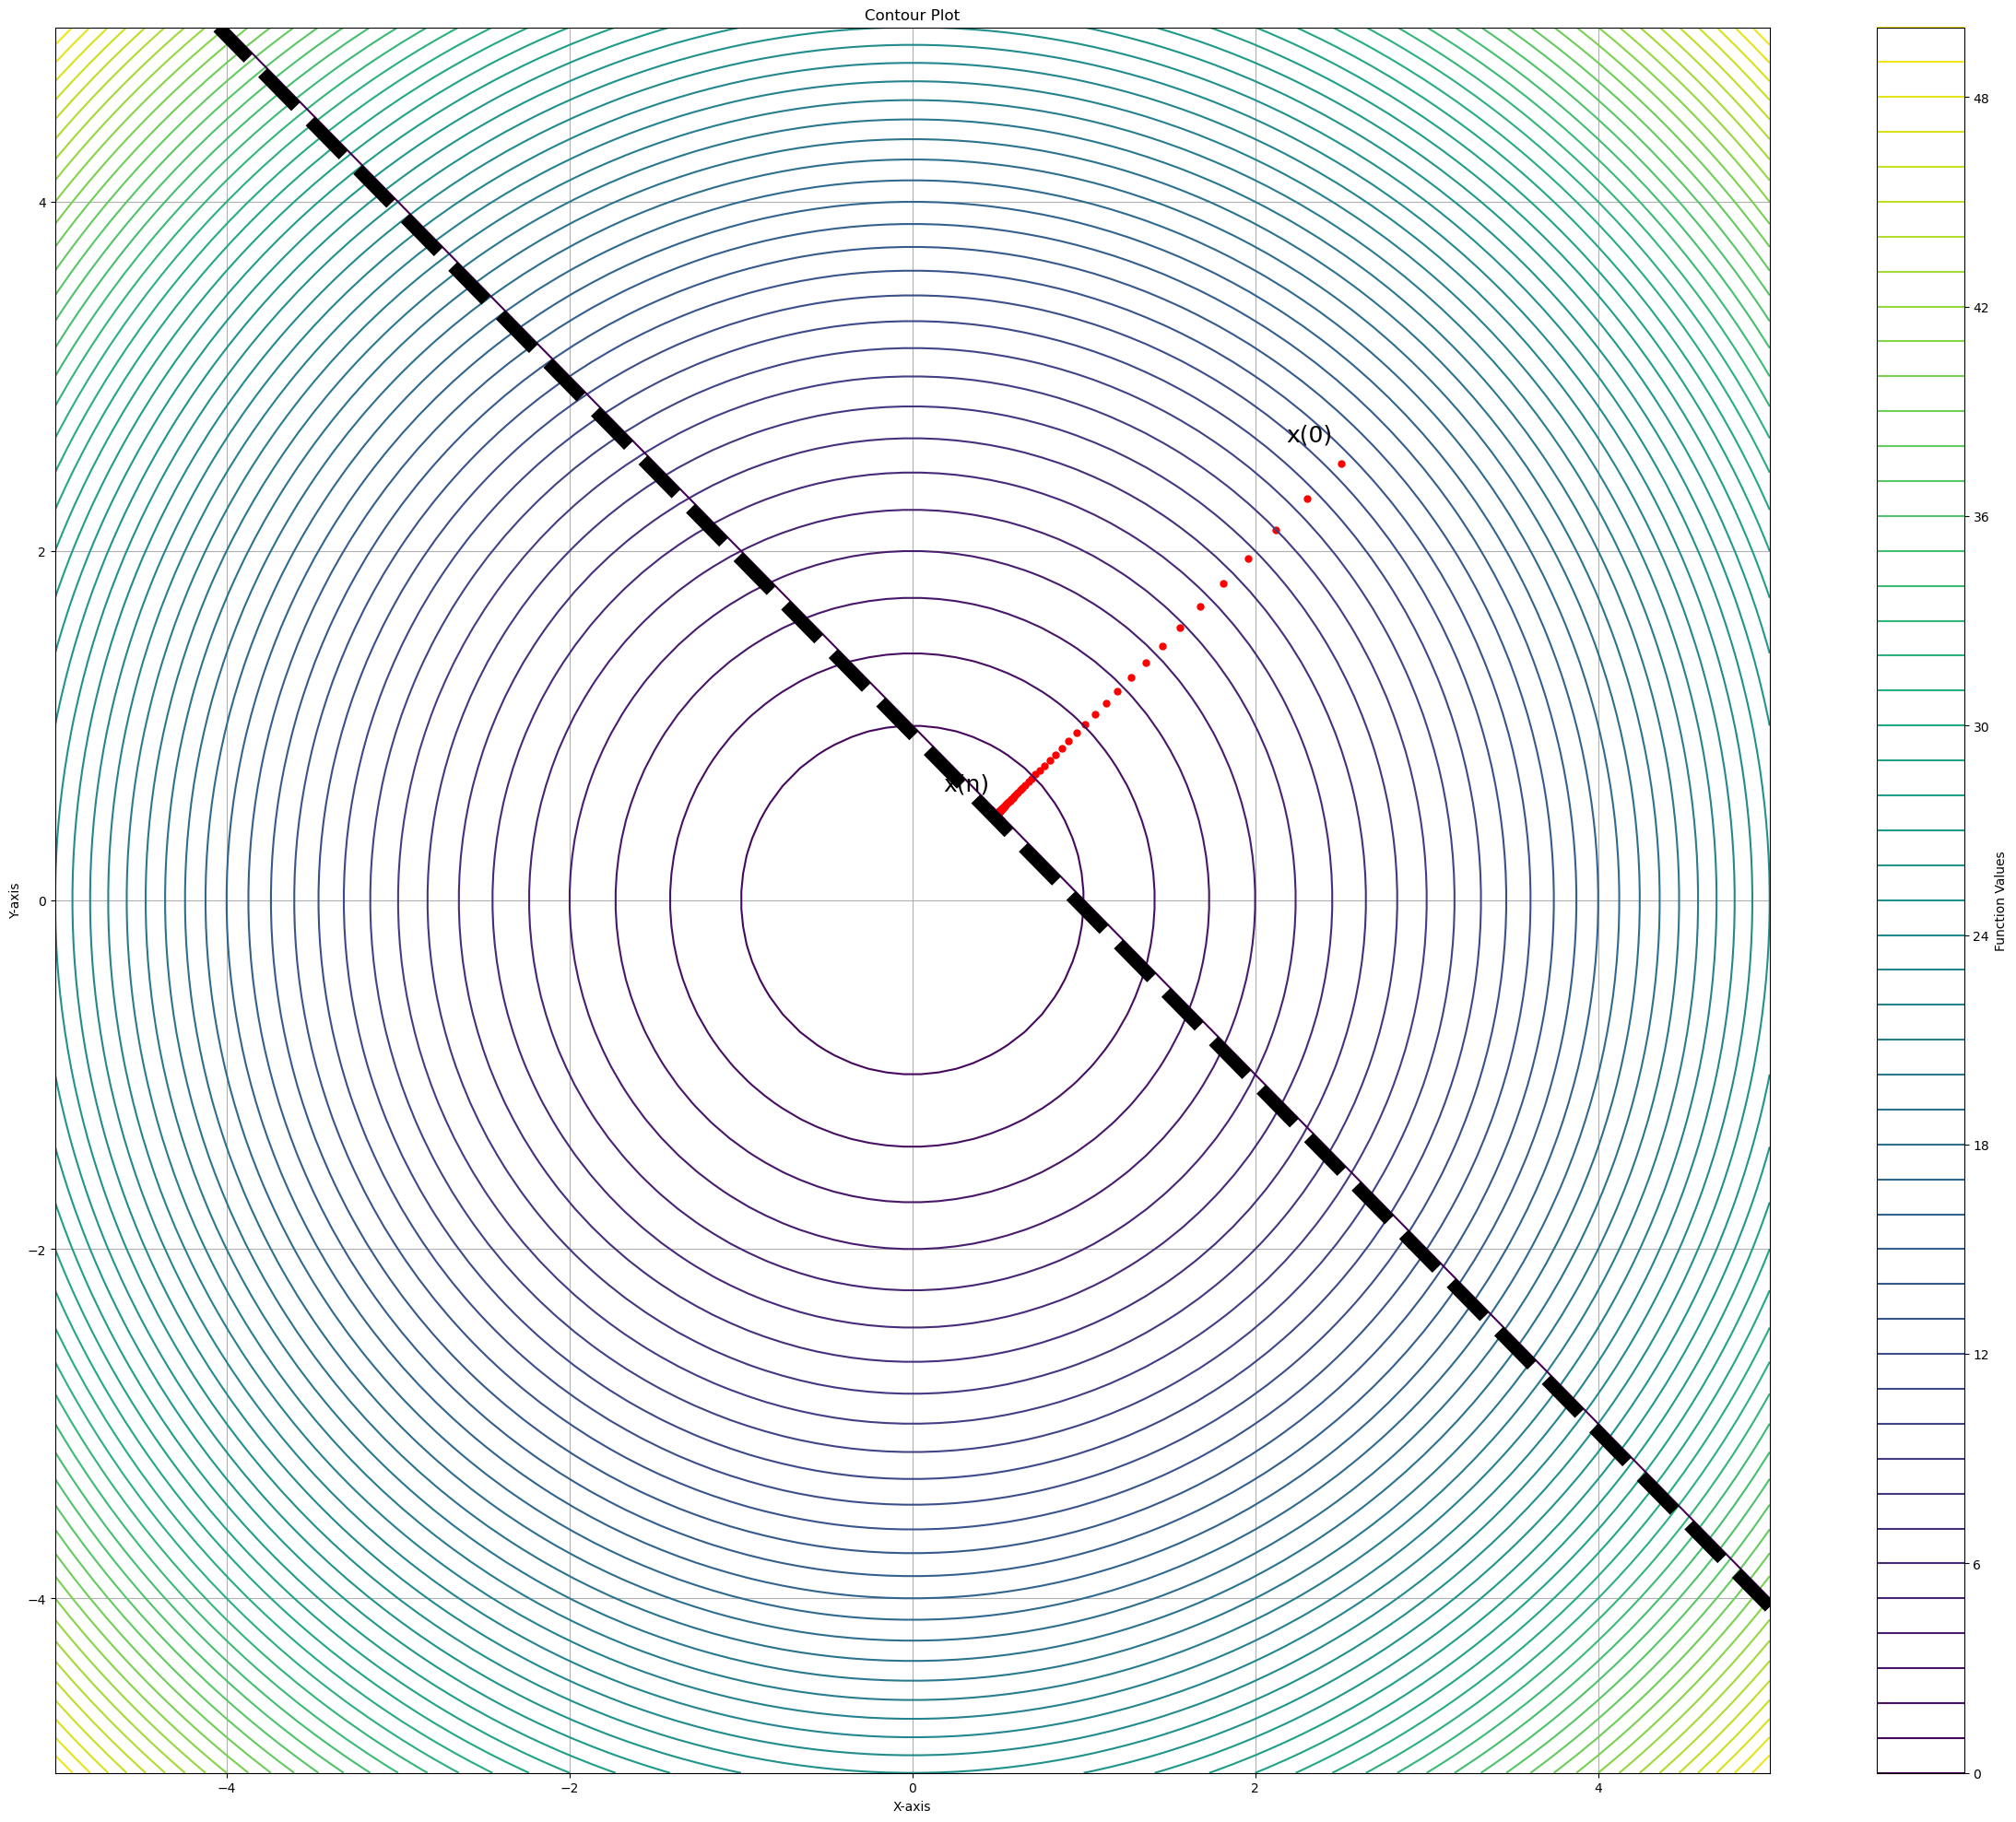

In [5]:
# plot the results

from utils.utils import UzawaPlotter

plotter = UzawaPlotter(solver=solver)
plotter.summary()

----------------------

## Cas d'étude 2 : Une fonction mal conditionnée

Dans cette partie, nous visons à étudier la convergence d'une fonction plus complexe et selon différentes configuration que nous allons exposer par la suite

Considérons la fonction suivante :

$$f(x, y) = \frac{1}{2} x^2 + 100 y ^ 2$$

Nous voulons optimiser cette fonction sous les contraintes suivantes :

$$K = \{(x, y) \in \mathbb{R}^2\ |\ g_{1}(x, y) = -x-y+1 \leq 0 \quad \text{et} \quad g_{2}(x, y) = x^2 - y \leq 0 \ \}$$

L'optimum théorique est donné par:

$$X^{*} = (\frac{-1+\sqrt{5}}{2}, \frac{3-\sqrt{5}}{2}) \approx (0.61, 0.38)$$

In [6]:
# define the function

function_2 = Function(
    lambda x: 0.5 * x[0] ** 2 + 100 * x[1] ** 2,
    lambda x: np.array([x[0], 200 * x[1]]),
    lambda x: np.array([[1, 0], [0, 200]])
) 

In [7]:
# define the first constrain
constraint_21 = Function(
    lambda x: -x[0] - x[1] + 1,
    lambda x: np.array([-1, -1]),
    lambda x: np.array([[0, 0], [0, 0]])
)

# define the second constraint
constraint_22 = Function(
    lambda x: x[0] ** 2 - x[1],
    lambda x: np.array([2 * x[0], -1]),
    lambda x: np.array([[2, 0], [0, 0]])
)

### Scénario 1 : Test avec un nombre d'iterations fixe (n = 500)

Nous allons étudier la convergence en considérant comme critère d'arrêt un nombre fixe d'itérations $\textbf{n = 500}$.

--------------------------------------------------------------------------------------

            
            Calculated Optiaml x: [0.61769731 0.37933099]
            iteration to convergence: 500


--------------------------------------------------------------------------------------


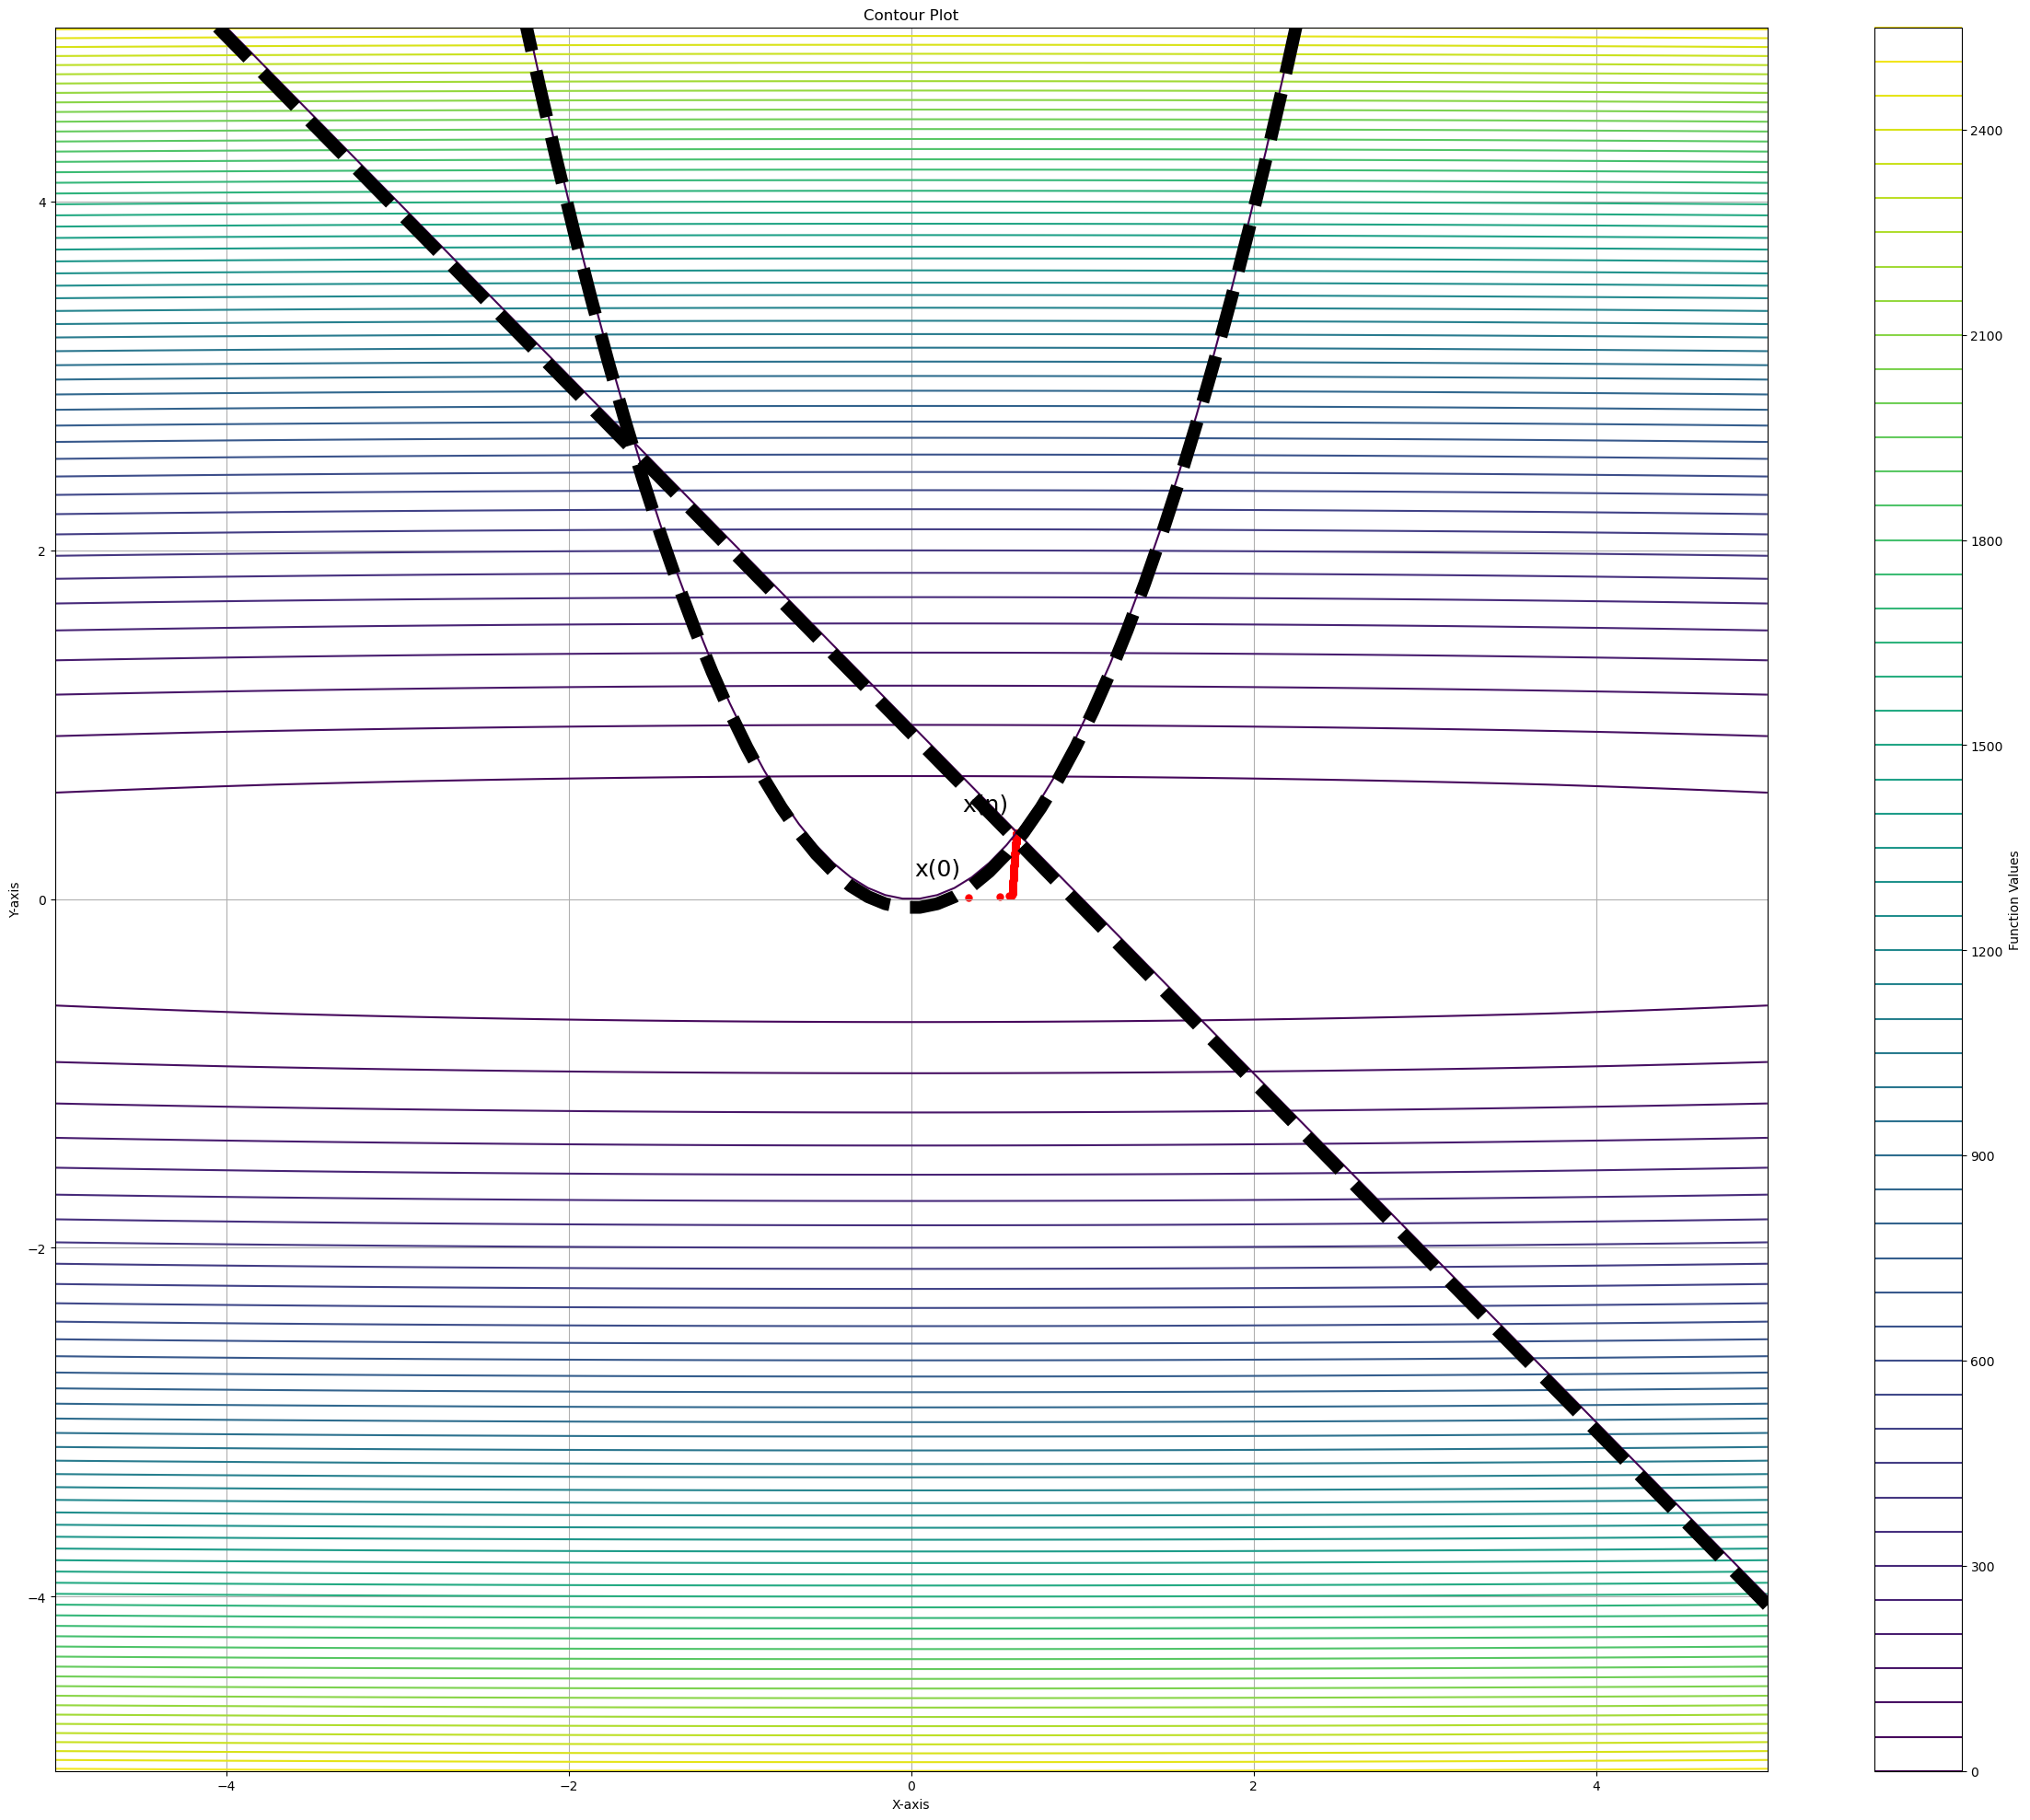

In [8]:
second_solver = UzawaSolver(function_2, [constraint_21, constraint_22])
second_solver.solve_min(
                            x0_internal=np.array([4, 4]), 
                            _lambda=np.array([1, 1]), 
                            tau=1, 
                            max_iter=500, 
                            alpha=0.005, 
                            use_epsilon_internal=True, 
                            max_iter_internal=1000
                       )
plotter2 = UzawaPlotter(second_solver)
plotter2.summary()

### Scénario 2 : Test avec tolérence $\ \mathbf{\epsilon = 10^{-3}}$

Nous allons étudier la convergence en considérant comme critère d'arrêt le critère d'incrément $\mathbf{\|X^{(k)} - X^{(k-1)}\| \leq \epsilon} \ $ avec $\ \mathbf{\epsilon = 10^{-3} = 0.001}$.

--------------------------------------------------------------------------------------

            
            Calculated Optiaml x: [0.61796989 0.38146687]
            iteration to convergence: 668


--------------------------------------------------------------------------------------


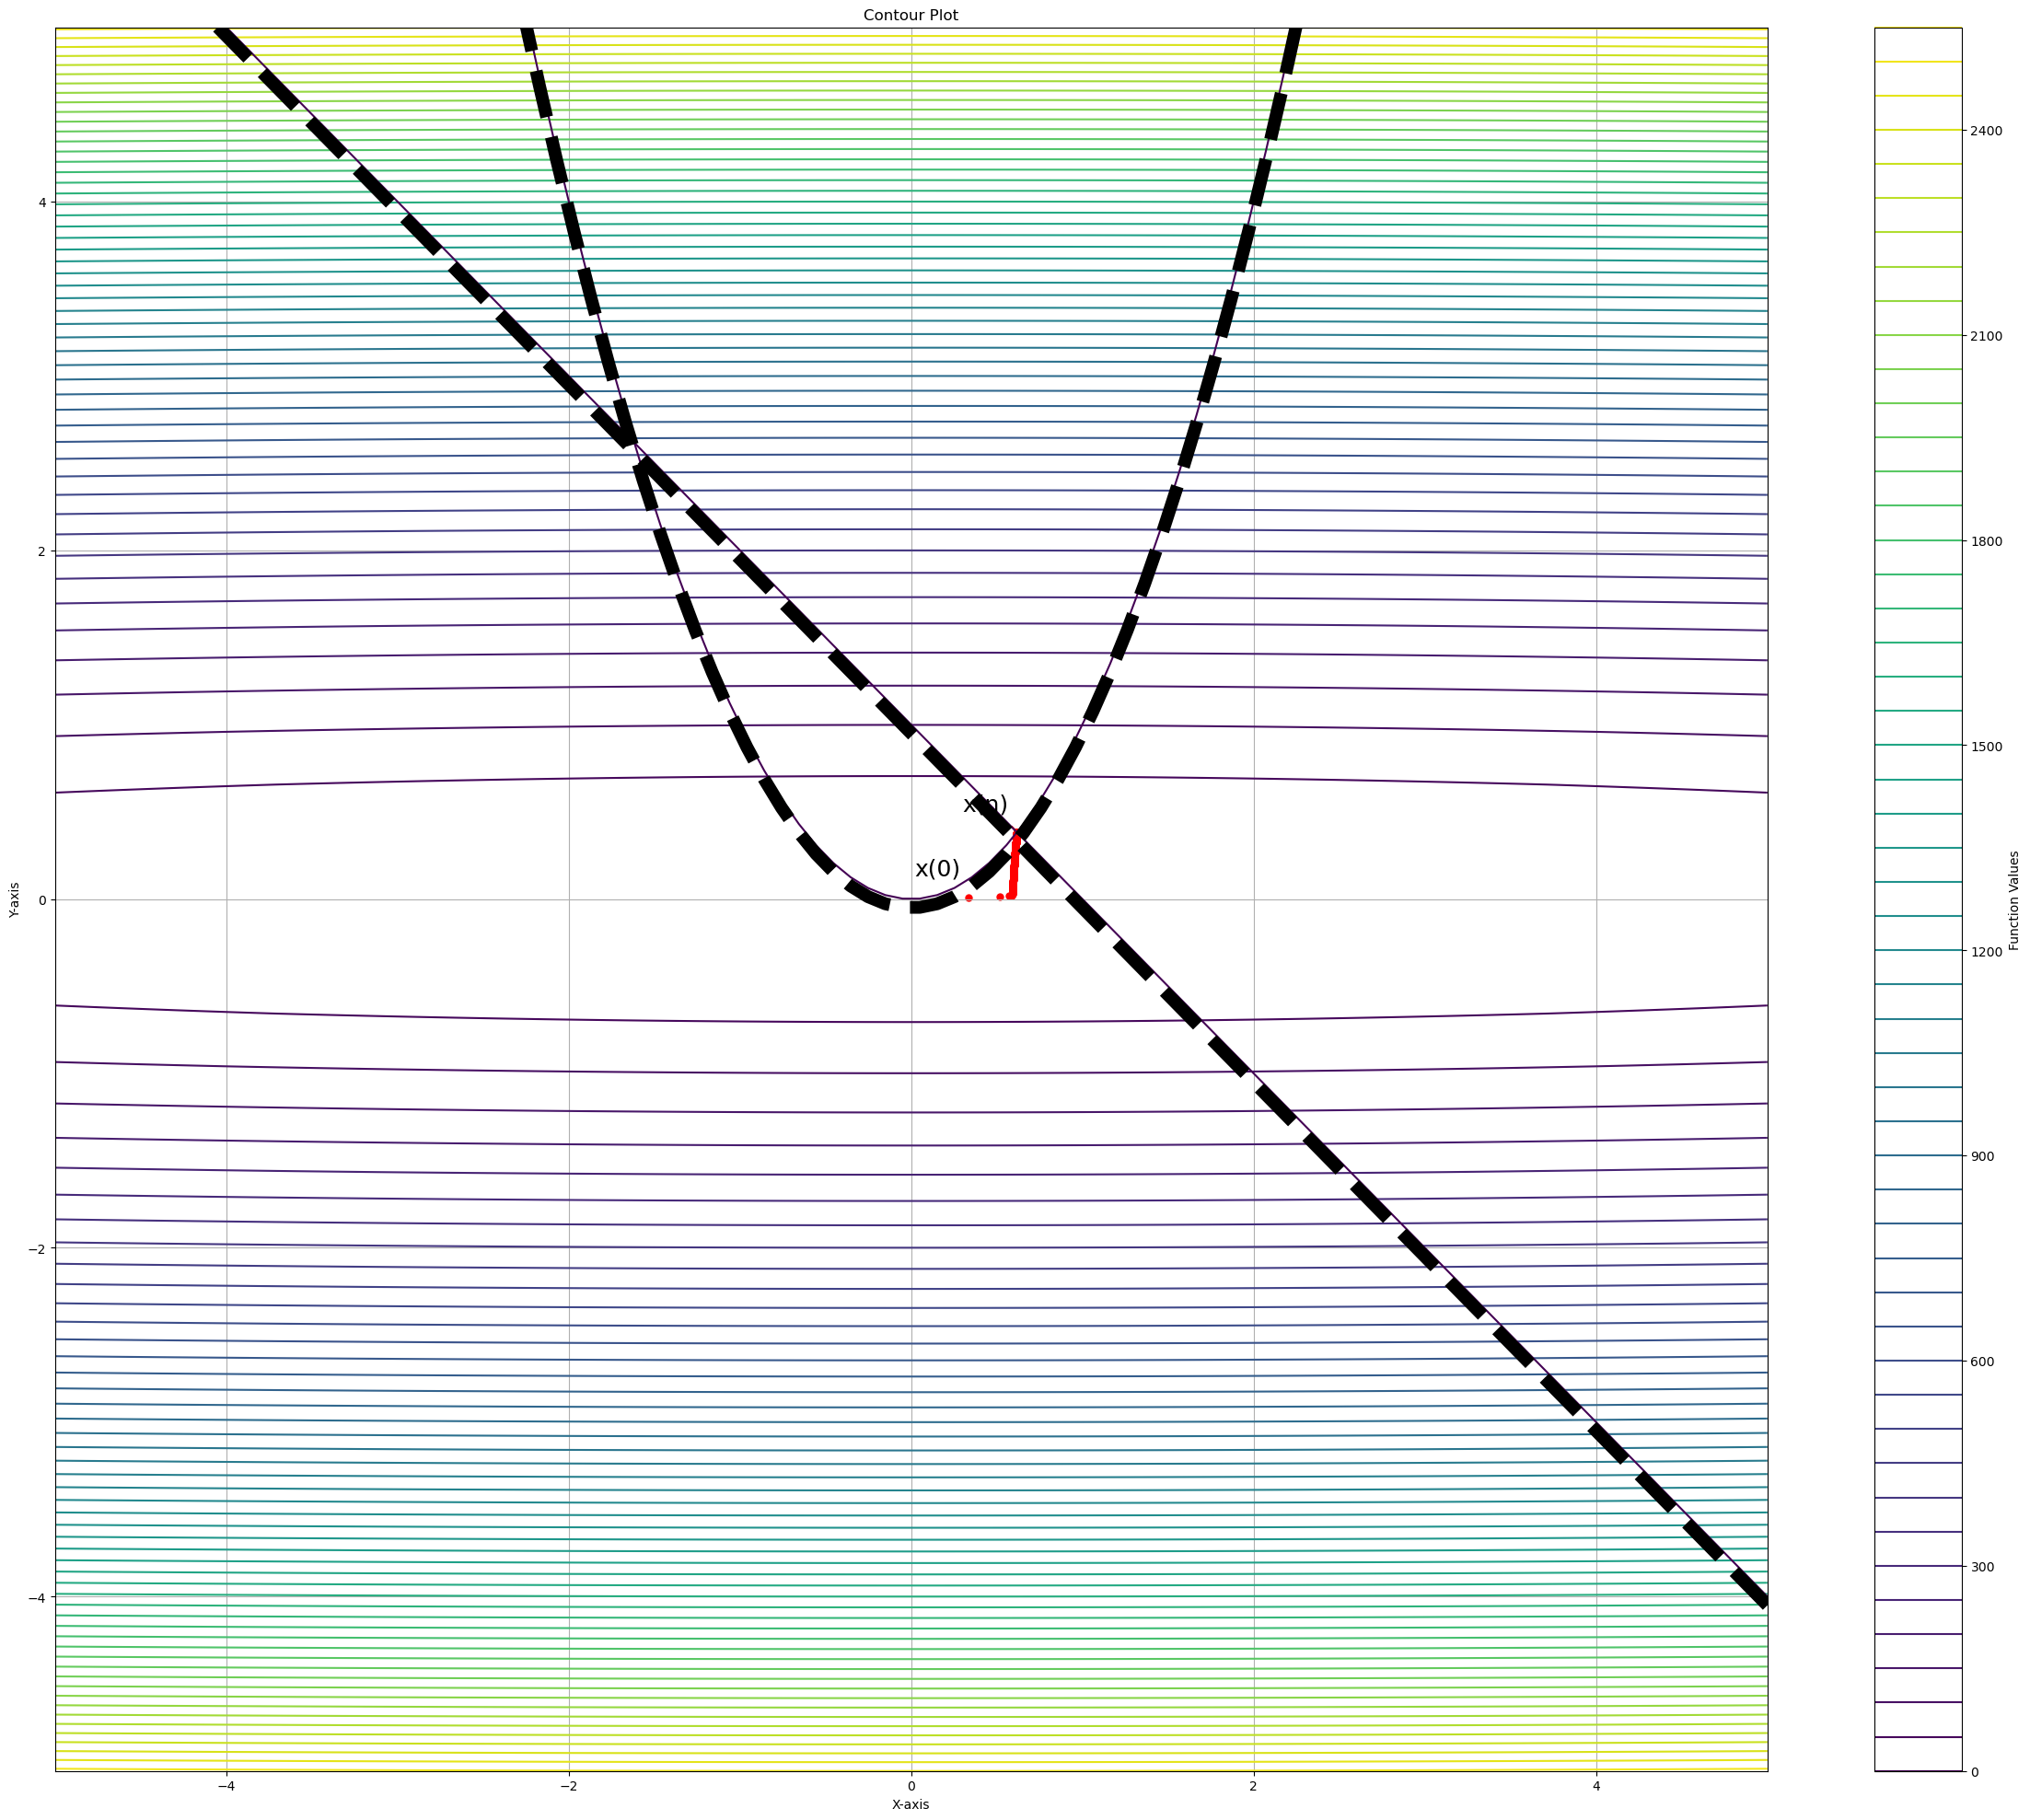

In [9]:
third_solver = UzawaSolver(function_2, [constraint_21, constraint_22])
third_solver.solve_min(
                            x0_internal=np.array([4, 4]), 
                            _lambda=np.array([1, 1]), 
                            tau=1, 
                            max_iter=1000, 
                            alpha=0.005,
                            use_epsilon_internal=True, 
                            max_iter_internal=1000,
                            use_epsilon=True, 
                            epsilon=0.001
                      )
plotter3 = UzawaPlotter(third_solver)
plotter3.summary()

### Scénarion 3 : Test avec un pas optimal 𝜏 = 36

Dans cette partie, nous avons tenté d'ajuster le pas de convergence $\tau$, et par expérimentation, nous avons trouvé que le meilleur pas est $\mathbf{\tau = 36}$. <br/> Nous avons utilisé les incréments comme critère d'arrêt.

--------------------------------------------------------------------------------------

            
            Calculated Optiaml x: [0.61803513 0.38197485]
            iteration to convergence: 30


--------------------------------------------------------------------------------------


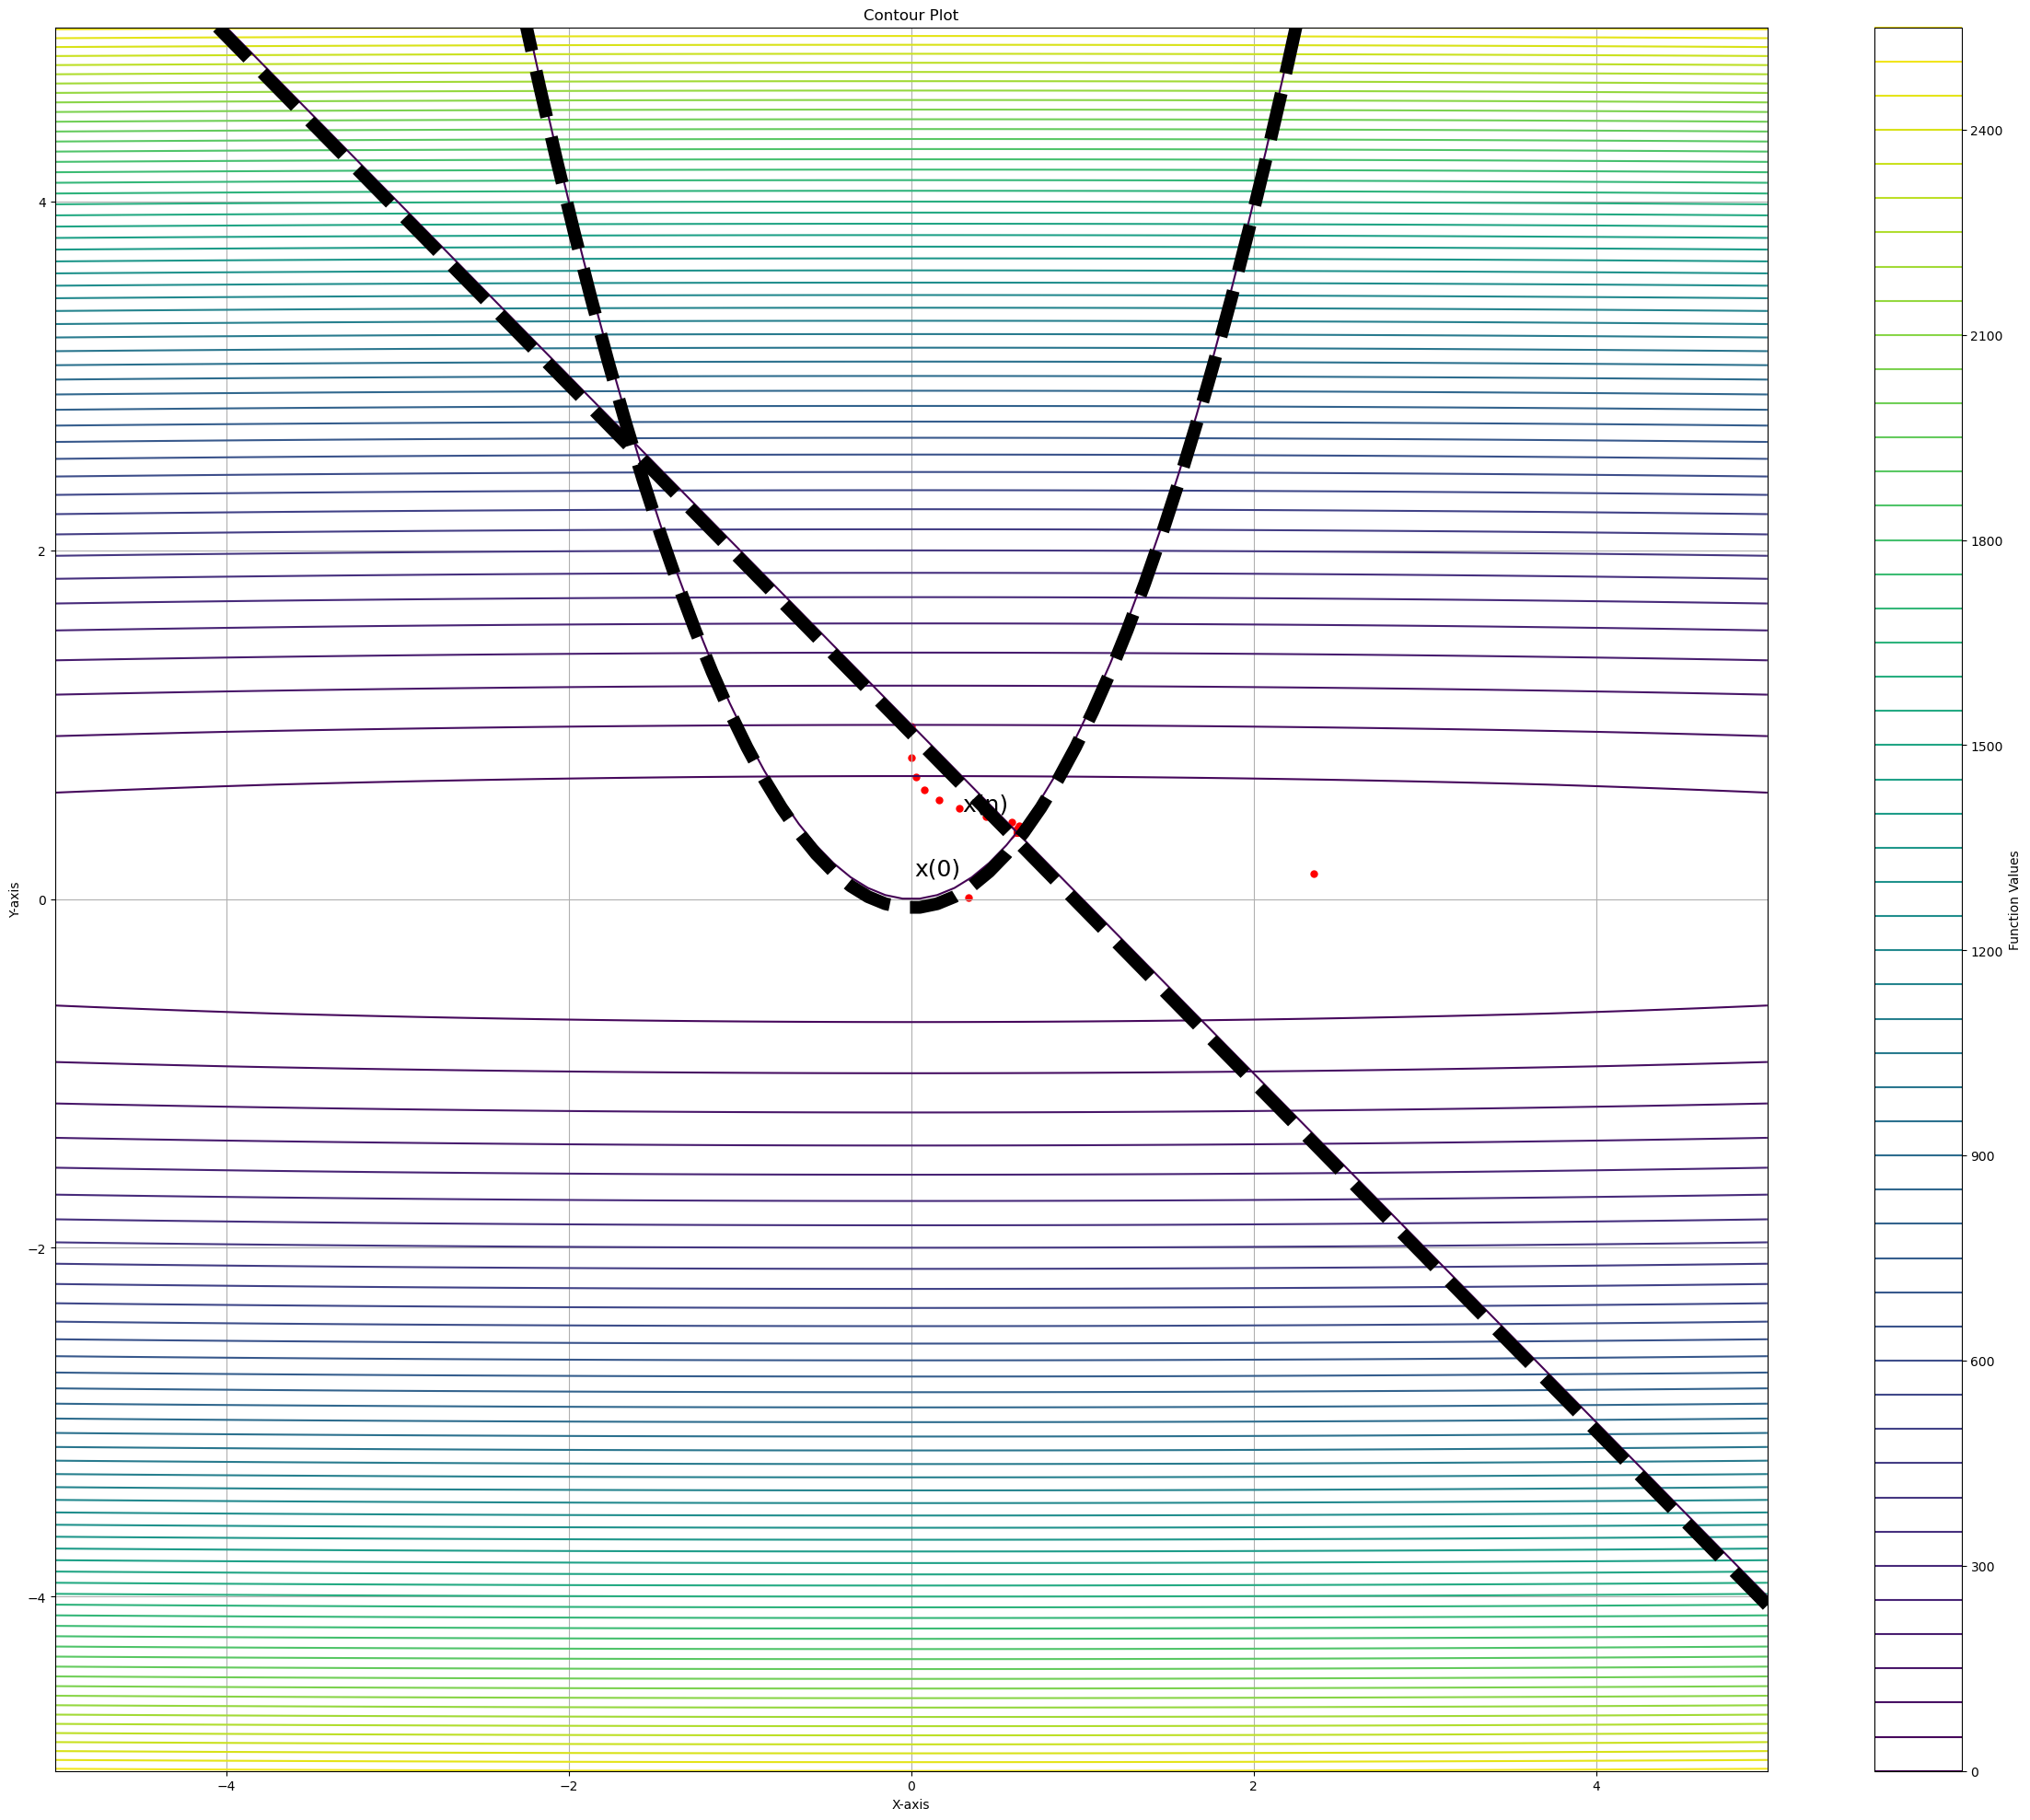

In [10]:
forth_solver = UzawaSolver(function_2, [constraint_21, constraint_22])
forth_solver.solve_min(
                            x0_internal=np.array([4, 4]), 
                            _lambda=np.array([1, 1]), 
                            tau=36, 
                            max_iter=500, 
                            alpha=0.005, 
                            use_epsilon_internal=True, 
                            max_iter_internal=1000,
                            use_epsilon=True, 
                            epsilon=0.001
                      )
plotter4 = UzawaPlotter(forth_solver)
plotter4.summary()

### Scénario 4 : Test avec un pas encore plus grand 𝜏 > 36

Lors de cette expérimentation, nous avons évalué la convergence en ajustant le pas encore une fois $\tau$ en le prenant légèrement supérieur à sa valeur optimale pas $\mathbf{\tau = 37}$ , et nous avons observé une divergence . Plus précisément, en augmentant le pas de convergence de seulement 1, nous avons constaté une divergence qui a même causé une explosion des valeurs des variables (dépassement de capacité : overflow).

C:\Users\Benouaklil Hodhaifa\AppData\Local\Temp\ipykernel_27268\1346209913.py:4: RuntimeWarning: overflow encountered in scalar power
  lambda x: 0.5 * x[0] ** 2 + 100 * x[1] ** 2,
C:\Users\Benouaklil Hodhaifa\AppData\Local\Temp\ipykernel_27268\4281133981.py:10: RuntimeWarning: overflow encountered in scalar power
  lambda x: x[0] ** 2 - x[1],
d:\BACKUP_houdhaifah\Documents\ESI\2CS\S1\MASD\TP\uzawa\utils\utils.py:27: RuntimeWarning: overflow encountered in multiply
  lambda x: value * self.__gradient__(x),
d:\BACKUP_houdhaifah\Documents\ESI\2CS\S1\MASD\TP\uzawa\utils\utils.py:21: RuntimeWarning: invalid value encountered in scalar add
  return Function(lambda x: self.__compute__(x) + other.__compute__(x),
d:\BACKUP_houdhaifah\Documents\ESI\2CS\S1\MASD\TP\uzawa\utils\utils.py:289: RuntimeWarning: invalid value encountered in subtract
  new_x = current_x - delta
d:\Anaconda\Lib\site-packages\numpy\lib\function_base.py:2412: RuntimeWarning: invalid value encountered in <lambda> (vectorize

--------------------------------------------------------------------------------------

            
            Calculated Optiaml x: [0.61803513 0.38197485]
            iteration to convergence: 30


--------------------------------------------------------------------------------------


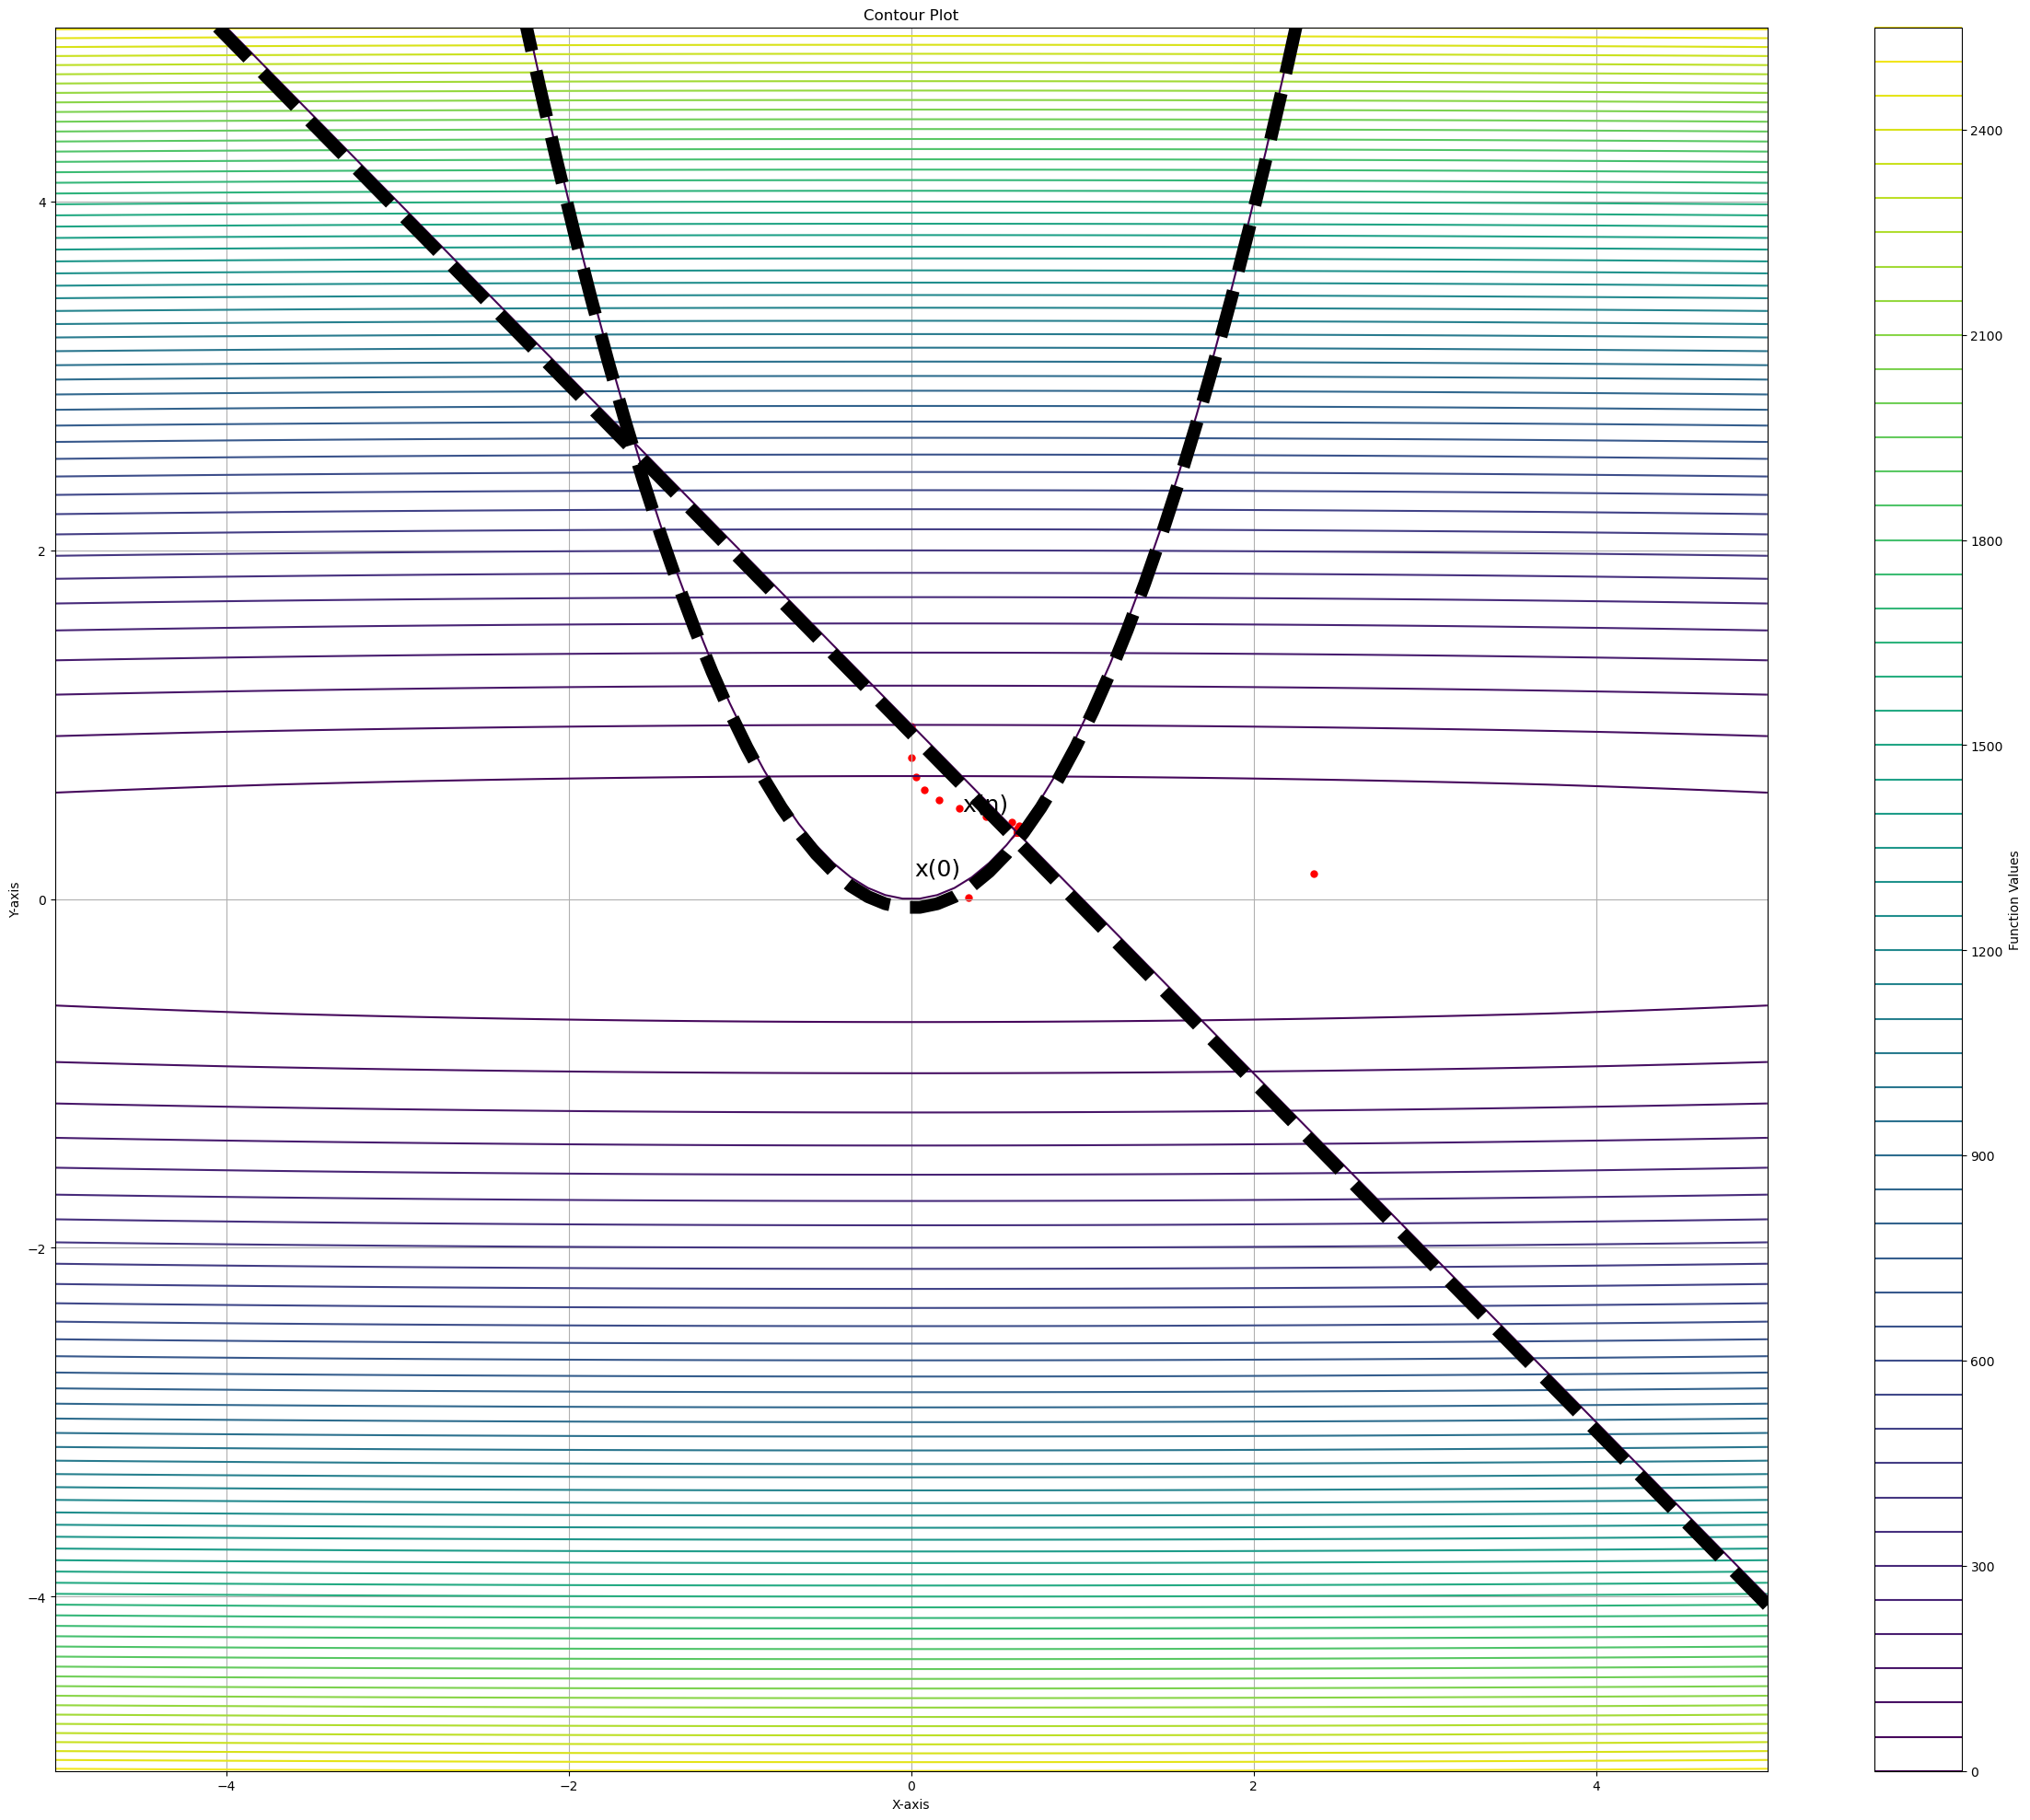

In [11]:
fifth_solver = UzawaSolver(function_2, [constraint_21, constraint_22])
fifth_solver.solve_min(
                            x0_internal=np.array([4, 4]), 
                            _lambda=np.array([1, 1]), 
                            tau=37, 
                            max_iter=500, 
                            alpha=0.005, 
                            use_epsilon_internal=True, 
                            max_iter_internal=1000,
                            use_epsilon=True, 
                            epsilon=0.001
                      )
plotter5 = UzawaPlotter(forth_solver)
plotter5.summary()

### Scénario 5 : Utilisation d'un pas variable (avec recherche linéaire)

Dans cette partie, nous testons l'effet d'utilisation d'un pas adaptatif calculé selon le principe de la recherche linéaire. <br/> Nous remarquons une convergence plus rapide en seulement 15 itérations.

--------------------------------------------------------------------------------------

            
            Calculated Optiaml x: [0.61755716 0.38198662]
            iteration to convergence: 15


--------------------------------------------------------------------------------------


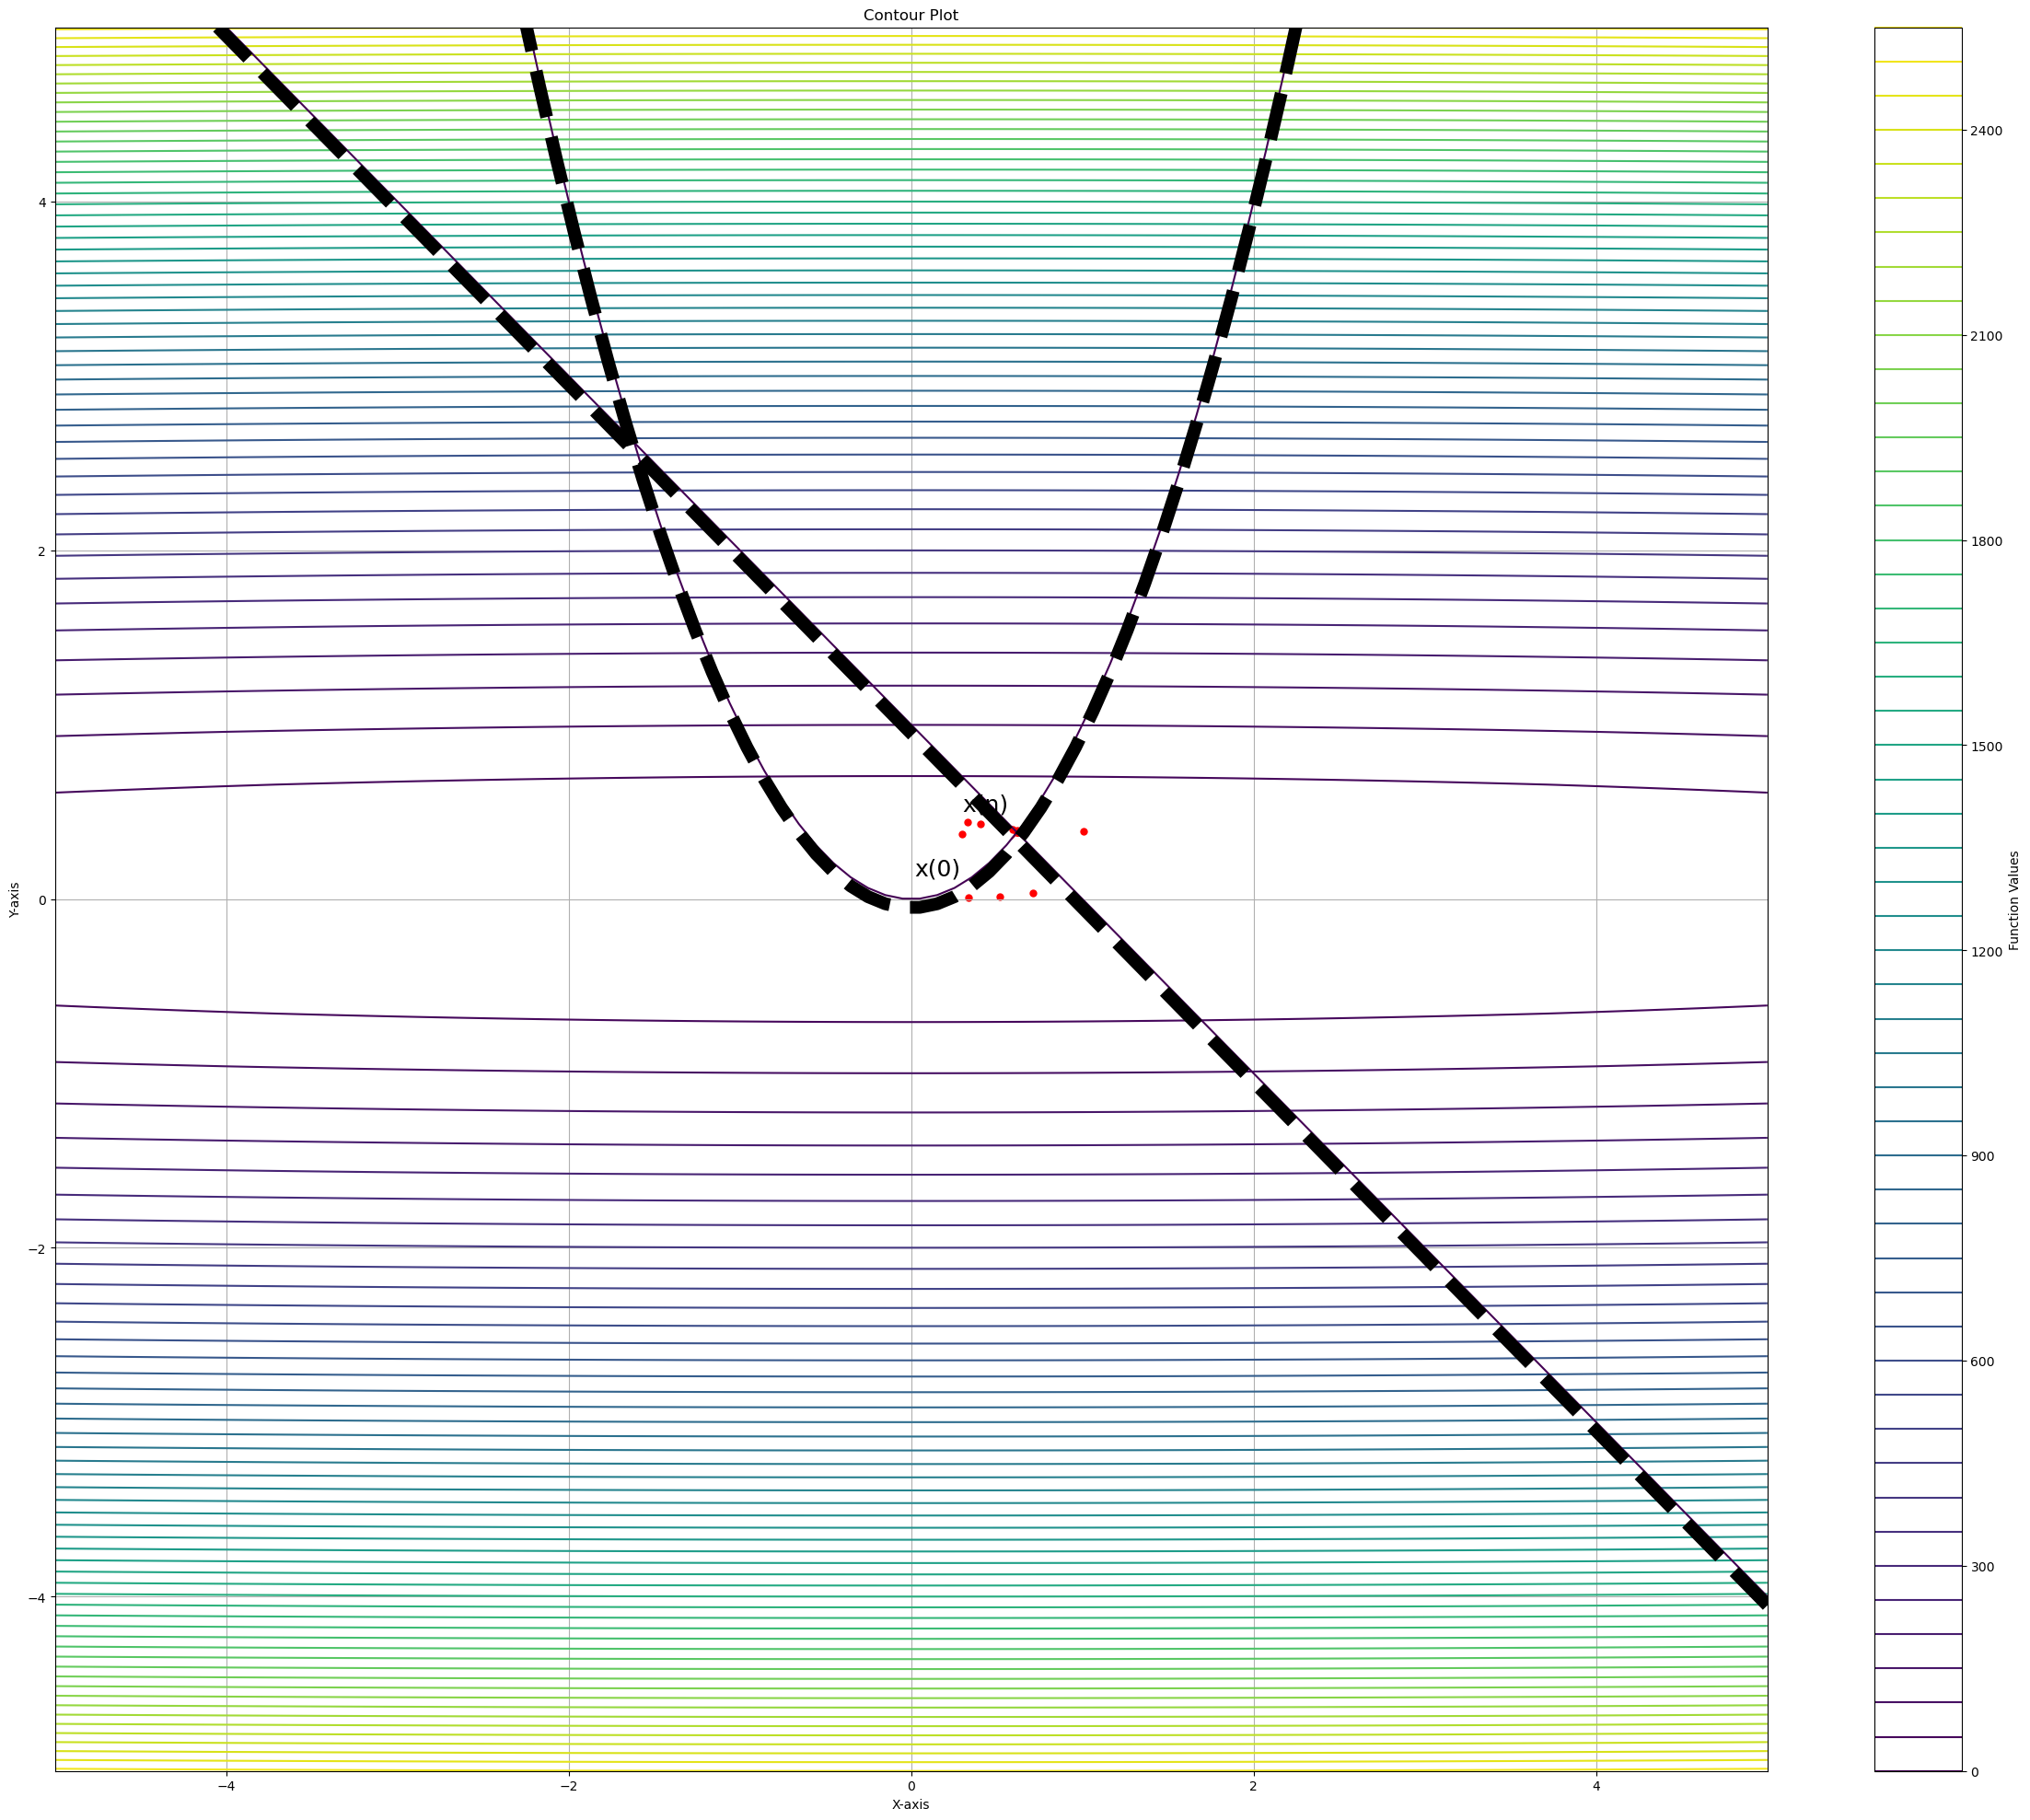

In [12]:
forth_solver = UzawaSolver(function_2, [constraint_21, constraint_22])
forth_solver.solve_min(
                            x0_internal=np.array([4, 4]), 
                            _lambda=np.array([1, 1]), 
                            tau=1, 
                            max_iter=500, 
                            alpha=0.005, 
                            use_epsilon_internal=True, 
                            max_iter_internal=1000,
                            use_epsilon=True, 
                            epsilon=0.001, 
                            decay_type='recherche-lineaire'  
                      )
plotter4 = UzawaPlotter(forth_solver)
plotter4.summary()

## Récapitulation des résultats 

En manipulant les hyper-paramètres, nous récapitulons les resultats des différentes expérimentations dans ce tableau :

|Scénario|$X^{(0)}$|$\lambda^{(0)}$|Pas $\tau$|Nombre d'itérations effectuées|Critère d'arrêt $\epsilon$|X final|Erreur = $\|X_{optimal} - X_{final}\|$|
|-----------|-----------|-----------------|-----------|------------------|--------------------------------|---------------------------|-----------|
|1|(4, 4)|(1, 1)|1|500 (Fixe)|/|(0.6123393, 0.33203833)|0.05025139634846255|
|2|(4, 4)|(1, 1)|1|668|0.001|(0.61796989, 0.38146687)|0.00050324013879514|
|3|(4, 4)|(1, 1)|36|30|0.001|(0.61803513, 0.38197485)|0.00000891212384937|
|4|(4, 4)|(1, 1)|37|/|0.001|Divergence|/|
|5|(4, 4)|(1, 1)|Variable|15|0.001|(0.61755716, 0.38198662)|0.00047727390175717|

## Conclusion

Tout au long de ce TP, nous avons implémenté la méthode d'Uzawa, basée sur la théorie de la dualité convexe pour résoudre des problèmes d'optimisation sous contraintes. Nous avons essayé de manipuler les hyper paramètres et nous avons pu tirer ces observations :

- **Critère d'arrêt :**
    - **Nombre d'itération fixe :** Converge si le nombre d'itérations est bien choisi.
    - **Incréments :** Permet une convergence plus stable. 

    <br/>

- **Pas de convergence :**
    - **Fixe :**
        - **Très petit :** Conduit à une convergence lente et peut ne pas converger du tout.
        - **Petit :** Assure une convergence stable mais lente.
        - **Assez grand (optimal) :** Permet une convergence rapide vers la solution optimale avec un nombre d'itérations significativement réduit.
        - **Grand (au delà du pas optimal) :** Peut entraîner une divergence et même causer un overflow numérique.
    - **Variable (adaptatif basé sur la recherche linéaire) :**
        - Permet une convergence très rapide au bout de quelques itérations seulement.
    
<br/>

Nous concluons que :
- Le choix du critère d'arrêt dépend de la complexité du problème à optimiser.
- En ce qui concerne le pas de convergence, tant un pas fixe optimal,  que l'utilisation d'un pas variable basé sur la recherche linéaire semblent être les plus performants conduisant à une convergence rapide avec un nombre d'itérations réduit.
<br/>

En conclusion, le choix des hyperparamètres joue un rôle crucial dans la performance de la méthode d'Uzawa.